In [1]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt 
import seaborn as sns # data visualizationsns.set_style('whitegrid') # set style for visualization
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_column',111)

warnings.filterwarnings('ignore')
from tools import *


In [2]:
df_solidity_finance=pd.read_csv('features_engineerd/F_solidity.csv')
df_dynamics_finance=pd.read_csv('features_engineerd/F_dynamics.csv')
df_service=pd.read_csv('features_engineerd/Service_Score.csv')
df_price_ratio=pd.read_csv('features_engineerd/Price_score.csv')
df_comfort=pd.read_csv('features_engineerd/Comfort_Score.csv')

In [3]:
df =pd.read_excel("insurance_compagies_4.xlsx")

df.head()

,Agency Name,Location,Number of Employees,Years in Business,Employee Satisfaction Index,Types of Policies Offered,Coverage Limits,Premium Rates,Types of Risk Accepted,Customer Reviews,Average Rating,Customer Support Availability,Annual Revenue,Profitability,Claim Settlement Time,Claim Approval Rate,Market Share,Customer Base,Use of Technology,Compliance with Regulations,Claims Handling Process,Pricing Method,Claim Frequency,Average Claim Amount,Loss Ratio,Customer Retention Rate,Market Penetration,Customer Acquisition Cost,Employee Turnover Rate,Fraud Detection Rate,Online Presence,ESG Score,Competition Analysis,Revenue Growth Rate,Claim Settlement Efficiency,Customer Lifetime Value,Employee Satisfaction Impact,Market Share Growth Rate,Fraud Detection Efficiency,Digital Engagement Score,Customer Churn Rate,Average Customer Revenue,Employee Productivity Score,previous revenue,previous_market_share
0,Greene-Dean,Andersonchester,53,24,4.33,"Valuable Cargo Insurance, Valuable Cargo Insur...","415726, 725614, 914793, 265903, 679037, 631220","1044.33, 2925.29, 1468.15, 3781.17, 4843.74, 3...",Comprehensive,Relationship once economic business experience...,2.85,Business Hours,5237609.72,0.30,19.32,98.45,28.18,National,Moderate,Yes,Inefficient,tarification à priori,214,7747.69,0.733814,41.24,6.48,2993.85,12.70,57.94,53.46,2.47,4.33,12.915856,5.095756,2.156996e+06,12.3405,41.320325,57.041930,55.93,58.76,98822.824906,98822.824906,4.638507e+06,19.940515
1,"Harrell, Cunningham and Kim",Sherrybury,11,10,4.02,"Voyage Policy, Named Perils Cargo Insurance, V...","273347, 966667, 881113","3329.87, 2864.45, 3335.47",Comprehensive,Food letter environment activity six cold. Car...,3.90,Business Hours,2927741.24,0.45,14.22,86.24,25.14,International,Low,Yes,Efficient,tarification à posteriori,805,2510.17,0.878275,43.27,95.61,4797.01,18.88,26.54,71.94,1.50,73.52,31.561627,6.064698,1.262037e+06,15.6780,58.012517,22.888096,73.44,56.73,266158.294545,266158.294545,2.225376e+06,15.910132
2,Alvarez-Hernandez,Freemanborough,35,25,3.26,"Valuable Cargo Insurance, Voyage Policy, Wareh...","673302, 521978, 793086, 309983","3138.43, 2649.12, 2345.73, 1356.88",Selective,Stop support number meeting feel. Research tho...,2.14,24/7,4765583.18,0.36,29.53,94.47,24.26,International,Moderate,No,Inefficient,tarification à posteriori,777,7451.21,0.838750,81.05,35.53,5855.61,37.87,86.67,54.23,1.51,42.74,89.980102,3.199120,3.856650e+06,6.9764,77.774187,81.877149,55.74,18.95,136159.519429,136159.519429,2.508464e+06,13.646526
3,"Fernandez, Norris and Beck",Port Pamelaton,97,10,4.05,"All-Risk Cargo Insurance, Warehouse-to-Warehou...","221122, 604715, 595567","3418.15, 2815.13, 2390.14",Comprehensive,Real difficult mouth future do town health sea...,3.96,Business Hours,1907349.00,0.33,23.75,97.16,11.83,Local,High,No,Moderate,tarification à priori,845,9784.36,0.310500,73.13,92.94,5265.99,20.09,83.15,57.06,1.12,56.61,11.612488,4.090947,1.389578e+06,16.0380,51.657626,80.788540,58.18,26.87,19663.391753,19663.391753,1.708903e+06,7.800465
4,"Key, Schmitt and Patel",Avilafurt,24,18,3.66,"Voyage Policy, Named Perils Cargo Insurance, V...","950924, 737937, 939540, 684362","2107.43, 1698.42, 4419.14, 4006.88",Comprehensive,Sit water recently plant book table. Hear matt...,2.85,24/7,2522869.44,0.46,21.25,93.39,5.84,National,High,No,Moderate,tarification à posteriori,343,1632.81,-0.063812,54.55,29.61,8777.62,25.05,96.90,78.91,1.24,79.16,6.073955,4.394824,1.367448e+06,10.4310,63.938719,90.494910,80.15,45.45,105119.560000,105119.560000,2.378406e+06,3.562307


In [4]:
df_final=pd.concat([df_solidity_finance,df_dynamics_finance,df_service,df_price_ratio,df_comfort],axis=1)

df_final['Compliance with Regulations']=df['Compliance with Regulations'].map({'Yes':1,'No':0})

In [5]:
df_final.head()

,Claim Frequency,Customer Acquisition Cost,Years in Business,Customer Base,Loss Ratio,Employee Satisfaction Impact,Average Customer Revenue,Financial_solidity,Types of Risk Accepted,Profitability,Market Penetration,ESG Score,Revenue Growth Rate,Annual Revenue,Financial_dynamics,Claim Settlement Time,Claim Approval Rate,Claims Handling Process,Service_score,premium_median,coverage_limit_median,Pricing Method,price_ratio_median,Price_Score,Digital Engagement Score,Use of Technology,Fraud Detection Efficiency,Comfort_score,Compliance with Regulations
0,214,2993.85,24,2,0.733814,12.3405,98822.824906,2,0,0.30,6.48,2.47,12.915856,5237609.72,0,19.32,98.45,0,0,3329.310,655128.5,0,219.367882,1,55.93,1,57.041930,2,1
1,805,4797.01,10,3,0.878275,15.6780,266158.294545,0,0,0.45,95.61,1.50,31.561627,2927741.24,0,14.22,86.24,2,1,3329.870,881113.0,1,216.616851,1,73.44,0,22.888096,1,1
2,777,5855.61,25,3,0.838750,6.9764,136159.519429,0,1,0.36,35.53,1.51,89.980102,4765583.18,0,29.53,94.47,0,0,2497.425,597640.0,1,239.459384,3,55.74,1,81.877149,2,0
3,845,5265.99,10,0,0.310500,16.0380,19663.391753,0,0,0.33,92.94,1.12,11.612488,1907349.00,0,23.75,97.16,1,0,2815.130,595567.0,0,160.328840,1,58.18,2,80.788540,3,0
4,343,8777.62,18,2,-0.063812,10.4310,105119.560000,1,0,0.46,29.61,1.24,6.073955,2522869.44,0,21.25,93.39,1,0,3057.155,838738.5,1,300.691197,2,80.15,2,90.494910,3,0


In [6]:
recommendation_clustering_liste=['Financial_solidity','Financial_dynamics','Price_Score','Comfort_score','Service_score']
df1=df_final[recommendation_clustering_liste]
df1.head()

,Financial_solidity,Financial_dynamics,Price_Score,Comfort_score,Service_score
0,2,0,1,2,0
1,0,0,1,1,1
2,0,0,3,2,0
3,0,0,1,3,0
4,1,0,2,3,0


In [67]:
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score

def Kmode_clustering(clustering_number,matrix):
    cost = []
    silhouette_coefficients=[]
    K = range(2,clustering_number)
    for num_clusters in list(K):
        kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 6,random_state=1476)
        clusters=kmode.fit_predict(matrix)
        cost.append(kmode.cost_)
       


    plt.plot(K, cost, 'bx-')
    plt.xlabel('No. of clusters')
    plt.ylabel('Cost')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    plt.style.use("fivethirtyeight")


In [ ]:
def sort_numpy_per_column(df_matrix,target,index):
    sorted_indices = np.argsort(-1*df_matrix[:, index]) 
    
    return target[sorted_indices]

def sort_matrix1_by_matrix2_column_index(df_matrix):
    liste=[]
    y=np.array([*range(df_matrix.shape[0])]).reshape((df_matrix.shape[0],1)) 
    for i in range(df_matrix.shape[1]):
        sorted_column=sort_numpy_per_column(df_matrix,y,i)
        liste.append(list(sorted_column))
    concat_matrix=liste[0]    
    for i in range(1,len(liste)):
        concat_matrix=np.concatenate([concat_matrix,liste[i]],axis=1)
    return concat_matrix    
def calculate_frequency_error(matrix,error=1):
    absolute_error=0
    
    for row in range(matrix.shape[0]) :
        frequency=np.bincount(matrix[row,:]).argmax()
        error_freq=np.count_nonzero(~(matrix[row,:]==frequency))
        absolute_error=(error_freq*error)+absolute_error
    return absolute_error  
def Calculate_coherent(matrix):
    new_matrix=sort_matrix1_by_matrix2_column_index(matrix)
    score=calculate_frequency_error(new_matrix)
    return score
def coherent_kmode_test(matrix):
    lowest_score=100
    random_seed=-1
    for i in range(0,3000,2):
        kmode = KModes(n_clusters=4, init = "Huang", n_init=6,random_state=i)

        clusters=kmode.fit_predict(matrix)

        best_centroids=kmode.cluster_centroids_
        score=Calculate_coherent(best_centroids)
        print('processing random state :',i)
        print('Score Coherent :',score)
        print('\n')
        if score<lowest_score:
            random_seed=i
            lowest_score=score
    return lowest_score,random_seed    

In [ ]:
score=coherent_kmode_test(df1.to_numpy())

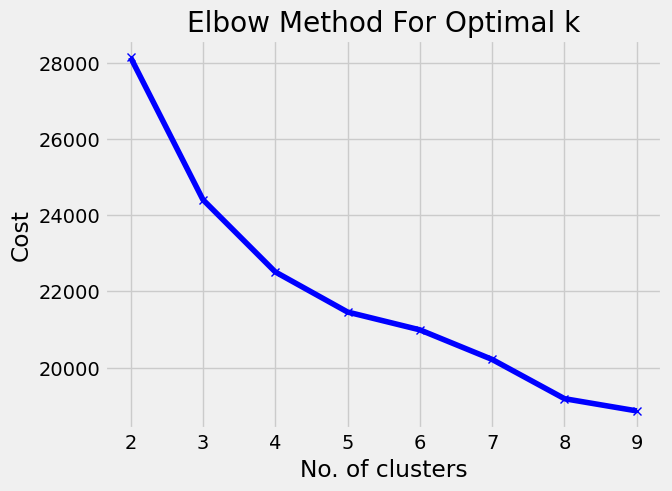

In [68]:
Kmode_clustering(10,df1.to_numpy())

In [64]:
from functions import display_parallel_coordinates_centroids


kmode = KModes(n_clusters=4, init = "Huang", n_init=10,verbose=0,max_iter=64,random_state=1476)
clusters=kmode.fit_predict(df1.to_numpy())


best_centroids=kmode.cluster_centroids_



                    ****************************                      
            Visualization of Boxplot               


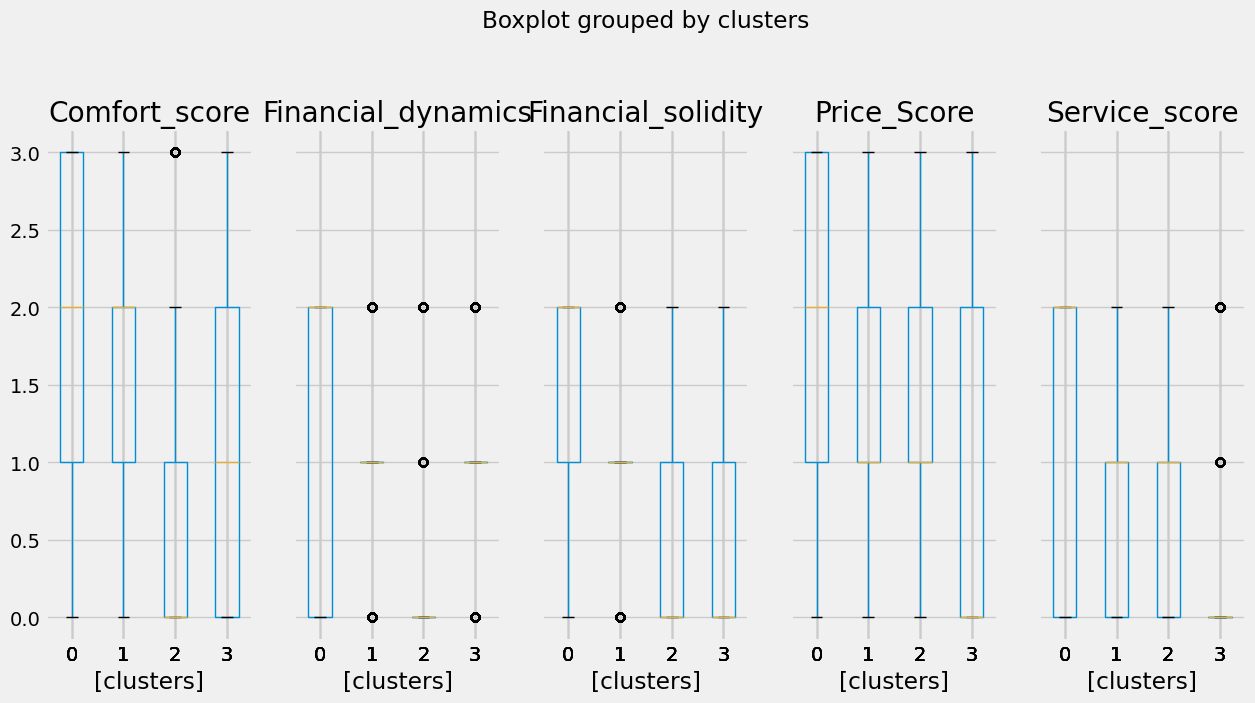

                    ****************************                      
            Visualization of Coordination Chart               


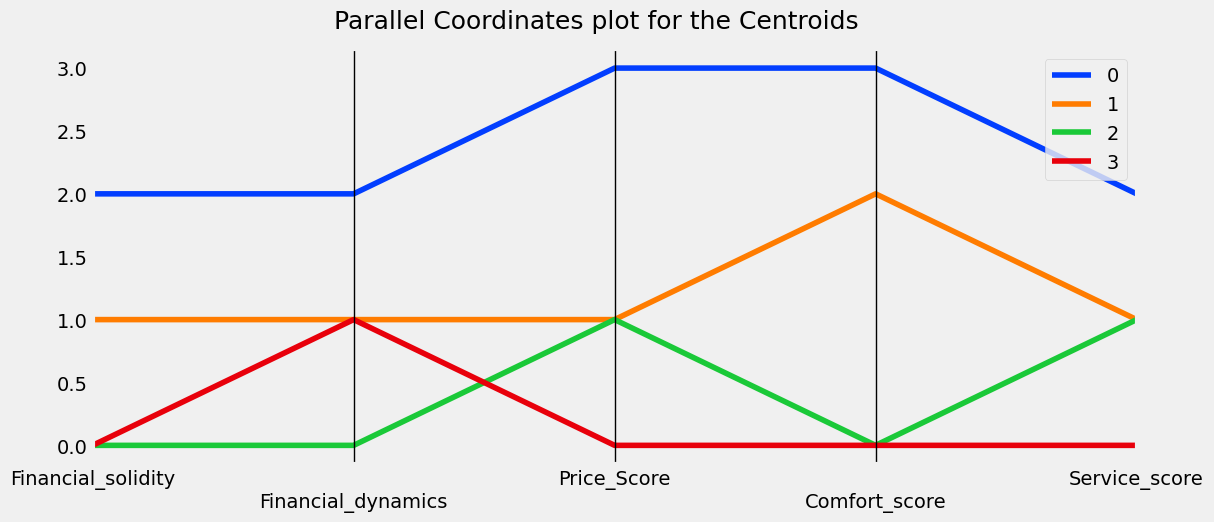

In [65]:
Visualization_results(df1.to_numpy(),df1,best_centroids,clusters,pca_v=False,violin_v=False)

### Remarques:

After encountering inconsistency in clustering results with the K-mode algorithm, I implemented a new approach to achieve more reliable clustering outcomes. The goal was to establish a method that consistently organizes clusters with meaningful classifications. 

#### Algorithm Description :

* Begin by ordering the centroids on each feature and Use the ordered indices to arrange the clusters accordingly .
* Iterate through the new ordered matrix rows. For each row, identify the cluster with the highest frequency.
* Calculate an error, representing a penalty for each mismatch between the highest frequency cluster and and other clusters.
* Aggregate these errors across all rows to compute a cumulative penalty score.
* Loop through a range of random seeds to generate multiple clustering outcomes.
* Select the random seed that yields the lowest cumulative penalty score, indicating the most coherent clustering outcome.


In [38]:
score=coherent_kmode_test(df1.to_numpy())

processing random state : 0
Score Coherent : 10


processing random state : 2
Score Coherent : 11


processing random state : 4
Score Coherent : 9


processing random state : 6
Score Coherent : 10


processing random state : 8
Score Coherent : 11


processing random state : 10
Score Coherent : 9


processing random state : 12
Score Coherent : 8


processing random state : 14
Score Coherent : 8


processing random state : 16
Score Coherent : 11


processing random state : 18
Score Coherent : 11


processing random state : 20
Score Coherent : 8


processing random state : 22
Score Coherent : 11


processing random state : 24
Score Coherent : 10


processing random state : 26
Score Coherent : 6


processing random state : 28
Score Coherent : 10


processing random state : 30
Score Coherent : 10


processing random state : 32
Score Coherent : 9


processing random state : 34
Score Coherent : 9


processing random state : 36
Score Coherent : 10


processing random state : 38
Score Coherent 

processing random state : 320
Score Coherent : 11


processing random state : 322
Score Coherent : 12


processing random state : 324
Score Coherent : 11


processing random state : 326
Score Coherent : 12


processing random state : 328
Score Coherent : 11


processing random state : 330
Score Coherent : 7


processing random state : 332
Score Coherent : 11


processing random state : 334
Score Coherent : 12


processing random state : 336
Score Coherent : 8


processing random state : 338
Score Coherent : 10


processing random state : 340
Score Coherent : 9


processing random state : 342
Score Coherent : 12


processing random state : 344
Score Coherent : 10


processing random state : 346
Score Coherent : 9


processing random state : 348
Score Coherent : 8


processing random state : 350
Score Coherent : 7


processing random state : 352
Score Coherent : 11


processing random state : 354
Score Coherent : 11


processing random state : 356
Score Coherent : 7


processing random s

processing random state : 638
Score Coherent : 11


processing random state : 640
Score Coherent : 9


processing random state : 642
Score Coherent : 12


processing random state : 644
Score Coherent : 9


processing random state : 646
Score Coherent : 11


processing random state : 648
Score Coherent : 10


processing random state : 650
Score Coherent : 11


processing random state : 652
Score Coherent : 9


processing random state : 654
Score Coherent : 12


processing random state : 656
Score Coherent : 10


processing random state : 658
Score Coherent : 11


processing random state : 660
Score Coherent : 12


processing random state : 662
Score Coherent : 11


processing random state : 664
Score Coherent : 12


processing random state : 666
Score Coherent : 8


processing random state : 668
Score Coherent : 9


processing random state : 670
Score Coherent : 9


processing random state : 672
Score Coherent : 9


processing random state : 674
Score Coherent : 5


processing random st

processing random state : 956
Score Coherent : 6


processing random state : 958
Score Coherent : 10


processing random state : 960
Score Coherent : 9


processing random state : 962
Score Coherent : 10


processing random state : 964
Score Coherent : 10


processing random state : 966
Score Coherent : 10


processing random state : 968
Score Coherent : 9


processing random state : 970
Score Coherent : 10


processing random state : 972
Score Coherent : 10


processing random state : 974
Score Coherent : 10


processing random state : 976
Score Coherent : 9


processing random state : 978
Score Coherent : 8


processing random state : 980
Score Coherent : 8


processing random state : 982
Score Coherent : 10


processing random state : 984
Score Coherent : 11


processing random state : 986
Score Coherent : 12


processing random state : 988
Score Coherent : 8


processing random state : 990
Score Coherent : 7


processing random state : 992
Score Coherent : 10


processing random st

processing random state : 1270
Score Coherent : 11


processing random state : 1272
Score Coherent : 11


processing random state : 1274
Score Coherent : 12


processing random state : 1276
Score Coherent : 9


processing random state : 1278
Score Coherent : 10


processing random state : 1280
Score Coherent : 8


processing random state : 1282
Score Coherent : 12


processing random state : 1284
Score Coherent : 11


processing random state : 1286
Score Coherent : 9


processing random state : 1288
Score Coherent : 11


processing random state : 1290
Score Coherent : 9


processing random state : 1292
Score Coherent : 11


processing random state : 1294
Score Coherent : 11


processing random state : 1296
Score Coherent : 10


processing random state : 1298
Score Coherent : 8


processing random state : 1300
Score Coherent : 6


processing random state : 1302
Score Coherent : 10


processing random state : 1304
Score Coherent : 12


processing random state : 1306
Score Coherent : 7




processing random state : 1582
Score Coherent : 9


processing random state : 1584
Score Coherent : 10


processing random state : 1586
Score Coherent : 9


processing random state : 1588
Score Coherent : 9


processing random state : 1590
Score Coherent : 11


processing random state : 1592
Score Coherent : 10


processing random state : 1594
Score Coherent : 10


processing random state : 1596
Score Coherent : 8


processing random state : 1598
Score Coherent : 10


processing random state : 1600
Score Coherent : 10


processing random state : 1602
Score Coherent : 9


processing random state : 1604
Score Coherent : 12


processing random state : 1606
Score Coherent : 9


processing random state : 1608
Score Coherent : 7


processing random state : 1610
Score Coherent : 10


processing random state : 1612
Score Coherent : 12


processing random state : 1614
Score Coherent : 10


processing random state : 1616
Score Coherent : 11


processing random state : 1618
Score Coherent : 11




processing random state : 1894
Score Coherent : 10


processing random state : 1896
Score Coherent : 8


processing random state : 1898
Score Coherent : 8


processing random state : 1900
Score Coherent : 8


processing random state : 1902
Score Coherent : 12


processing random state : 1904
Score Coherent : 8


processing random state : 1906
Score Coherent : 9


processing random state : 1908
Score Coherent : 9


processing random state : 1910
Score Coherent : 7


processing random state : 1912
Score Coherent : 12


processing random state : 1914
Score Coherent : 12


processing random state : 1916
Score Coherent : 10


processing random state : 1918
Score Coherent : 9


processing random state : 1920
Score Coherent : 9


processing random state : 1922
Score Coherent : 12


processing random state : 1924
Score Coherent : 9


processing random state : 1926
Score Coherent : 11


processing random state : 1928
Score Coherent : 10


processing random state : 1930
Score Coherent : 10


pro

processing random state : 2206
Score Coherent : 11


processing random state : 2208
Score Coherent : 9


processing random state : 2210
Score Coherent : 12


processing random state : 2212
Score Coherent : 5


processing random state : 2214
Score Coherent : 10


processing random state : 2216
Score Coherent : 12


processing random state : 2218
Score Coherent : 9


processing random state : 2220
Score Coherent : 9


processing random state : 2222
Score Coherent : 10


processing random state : 2224
Score Coherent : 11


processing random state : 2226
Score Coherent : 9


processing random state : 2228
Score Coherent : 8


processing random state : 2230
Score Coherent : 8


processing random state : 2232
Score Coherent : 9


processing random state : 2234
Score Coherent : 10


processing random state : 2236
Score Coherent : 12


processing random state : 2238
Score Coherent : 11


processing random state : 2240
Score Coherent : 10


processing random state : 2242
Score Coherent : 12


p

processing random state : 2518
Score Coherent : 11


processing random state : 2520
Score Coherent : 10


processing random state : 2522
Score Coherent : 8


processing random state : 2524
Score Coherent : 10


processing random state : 2526
Score Coherent : 8


processing random state : 2528
Score Coherent : 9


processing random state : 2530
Score Coherent : 11


processing random state : 2532
Score Coherent : 9


processing random state : 2534
Score Coherent : 10


processing random state : 2536
Score Coherent : 6


processing random state : 2538
Score Coherent : 9


processing random state : 2540
Score Coherent : 10


processing random state : 2542
Score Coherent : 11


processing random state : 2544
Score Coherent : 9


processing random state : 2546
Score Coherent : 9


processing random state : 2548
Score Coherent : 8


processing random state : 2550
Score Coherent : 6


processing random state : 2552
Score Coherent : 11


processing random state : 2554
Score Coherent : 10


pro

processing random state : 2830
Score Coherent : 11


processing random state : 2832
Score Coherent : 9


processing random state : 2834
Score Coherent : 9


processing random state : 2836
Score Coherent : 10


processing random state : 2838
Score Coherent : 7


processing random state : 2840
Score Coherent : 9


processing random state : 2842
Score Coherent : 10


processing random state : 2844
Score Coherent : 9


processing random state : 2846
Score Coherent : 11


processing random state : 2848
Score Coherent : 9


processing random state : 2850
Score Coherent : 11


processing random state : 2852
Score Coherent : 8


processing random state : 2854
Score Coherent : 11


processing random state : 2856
Score Coherent : 12


processing random state : 2858
Score Coherent : 8


processing random state : 2860
Score Coherent : 7


processing random state : 2862
Score Coherent : 10


processing random state : 2864
Score Coherent : 12


processing random state : 2866
Score Coherent : 11


pr

In [39]:
score # So we choose the random_seed of 1476 because it provide the lowest score

(2, 1476)

## Observations from the coordination plot:

After analyzing the coordination plot, it's evident that Cluster 0 demonstrates the strongest performance across all metrics. Following closely behind is Cluster 1, which consistently outperforms Clusters 2 and 3. Between Clusters 2 and 3, Cluster 2 shows slightly superior performance in Financial Dynamics, while Cluster 3 exhibits slightly better scores in Price Score and Service Score.

## Cluster Interpretation :

### Cluster 0:

   * Demonstrates the strongest performance across all metrics.
   * Likely represents companies with robust financial stability, dynamic operations, competitive pricing, and excellent service quality.
   * Positioned as industry leaders or high-performing entities with a comprehensive approach to business operations.

### Cluster 1:

   * Consistently performs well across various metrics, although slightly behind Cluster 0.
   * Represents companies with solid financial footing, efficient operations, and a commitment to delivering value to customers.
   * Likely comprises established players in the market with a strong reputation for reliability and quality.

### Cluster 2 :

   * Shows slightly better performance in Financial Dynamics compared to Cluster 3.
   * Indicates companies with a focus on financial agility and adaptability, capable of responding effectively to market dynamics.
   * May prioritize strategic financial management and operational efficiency to maintain competitiveness.

### Cluster 3 :

   * Exhibits slightly better scores in Price Score and Service Score compared to Cluster 2.
   * Represents companies that excel in offering competitive pricing and superior service experience to customers.
   * Likely targets specific market segments or niches with tailored pricing strategies and exceptional customer service.